In [19]:
import pandas as pd
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from skopt.callbacks import DeltaYStopper
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, roc_auc_score, precision_score, recall_score, accuracy_score, \
    f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [20]:
RootDir = '/Users/ggray15/src/python/repos/jhach_cpdsam_symposium_workshop'
os.chdir(RootDir)

In [21]:
%run "./notebooks/function_library.ipynb"

In [22]:
train_impute = pd.read_csv('data/train_smote.csv')
test_impute = pd.read_csv('data/test_impute.csv')

In [23]:
train_features = train_impute.columns[1:]
target_feature = 'readmit_flag'

# Get X/y
X_train = train_impute[train_features]
X_test = test_impute[train_features]
y_train = train_impute[target_feature]
y_test = test_impute[target_feature]

In [24]:
param_files = [
    'lr_params.json',
    'knn_params.json',
    'svm_params.json',
    'mlp_params.json',
    'rf_params.json',
    'gb_params.json',
]

param_dict = dict()

for iFile in param_files:
    iKey = iFile.split('_')[0]
    with open(os.path.join('input',iFile),'r') as f:
        params = json.load(f)
        param_dict[iKey] = BuildSamplingDict(params)

In [25]:
estimator_dict = {
    'lr': LogisticRegression(max_iter=1000),
    'knn': KNeighborsClassifier(),
    'svm': SVC(probability=True),
    'mlp': MLPClassifier(max_iter=1000),
    'rf': RandomForestClassifier(),
    'gb': GradientBoostingClassifier()
}

In [26]:
model_dict = dict()

for iKey in estimator_dict:

    print(f'##### Now processing model {iKey} #####')

    model_dict[iKey] = TuneHyperParameters(
        X_train=X_train, y_train=y_train, estimator=estimator_dict[iKey],param_dict=param_dict[iKey])
    
    test_score = EvaluateModel(X_test=X_test,y_test=y_test,estimator=model_dict[iKey])
    print(f'  > Test score was {test_score}')   

##### Now processing model lr #####
  > Test score was 0.012987012987012986
##### Now processing model knn #####
  > Test score was 0.04772234273318872
##### Now processing model svm #####


/Users/ggray15/opt/anaconda3/envs/py310_datascience/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


  > Test score was 0.0599250936329588
##### Now processing model mlp #####
  > Test score was 0.05056179775280899
##### Now processing model rf #####
  > Test score was 0.061224489795918366
##### Now processing model gb #####
  > Test score was 0.08522727272727272


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


##### Now processing model lr #####
Accuracy: 0.9374485596707819
F1 Score: 0.012987012987012986
AUC: 0.5096812828531505
Precision: 0.010309278350515464
Recall: 0.017543859649122806
logloss: 2.254582434216382
PPV: 0.010309278350515464
NPV: 0.9759965709387055
True Negative: 2277
False Positive: 96
False Negative: 56
True Positive: 1
##### Now processing model knn #####


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8193415637860082
F1 Score: 0.04772234273318872
AUC: 0.5634587944788223
Precision: 0.027227722772277228
Recall: 0.19298245614035087
logloss: 6.51159005671705
PPV: 0.027227722772277228
NPV: 0.9772951628825272
True Negative: 1980
False Positive: 393
False Negative: 46
True Positive: 11
##### Now processing model svm #####


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8967078189300411
F1 Score: 0.0599250936329588
AUC: 0.607706582089442
Precision: 0.0380952380952381
Recall: 0.14035087719298245
logloss: 3.7230275722915245
PPV: 0.0380952380952381
NPV: 0.9779279279279279
True Negative: 2171
False Positive: 202
False Negative: 49
True Positive: 8
##### Now processing model mlp #####
Accuracy: 0.8609053497942387
F1 Score: 0.05056179775280899
AUC: 0.5492788017240742
Precision: 0.030100334448160536
Recall: 0.15789473684210525
logloss: 5.013479360296954
PPV: 0.030100334448160536
NPV: 0.9774753636790239
True Negative: 2083
False Positive: 290
False Negative: 48
True Positive: 9
##### Now processing model rf #####


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8864197530864197
F1 Score: 0.061224489795918366
AUC: 0.5915156623121225
Precision: 0.0379746835443038
Recall: 0.15789473684210525
logloss: 4.093847051603429
PPV: 0.0379746835443038
NPV: 0.9781121751025992
True Negative: 2145
False Positive: 228
False Negative: 48
True Positive: 9
##### Now processing model gb #####
Accuracy: 0.8674897119341564
F1 Score: 0.08522727272727272
AUC: 0.6270913271379038
Precision: 0.05084745762711865
Recall: 0.2631578947368421
logloss: 4.776154893537335
PPV: 0.05084745762711865
NPV: 0.980327868852459
True Negative: 2093
False Positive: 280
False Negative: 42
True Positive: 15


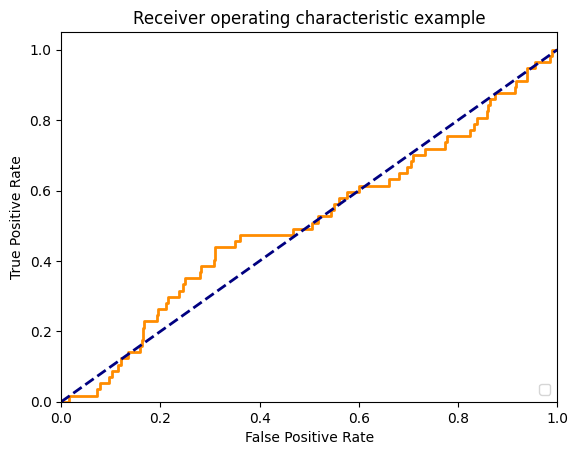

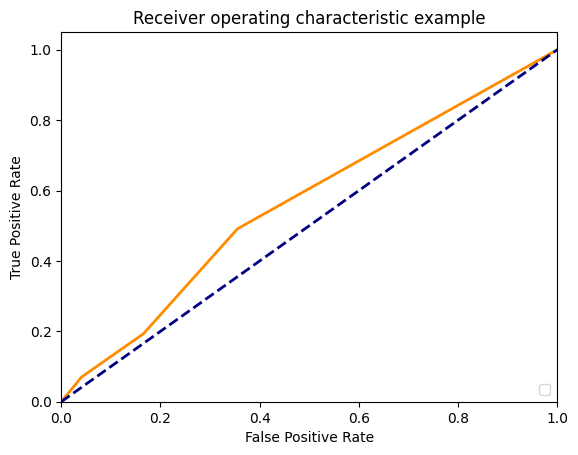

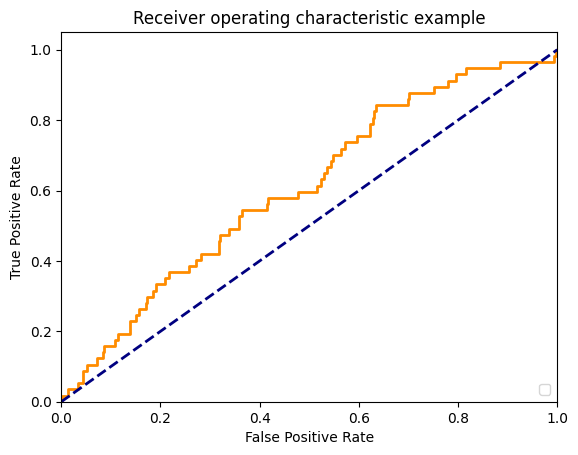

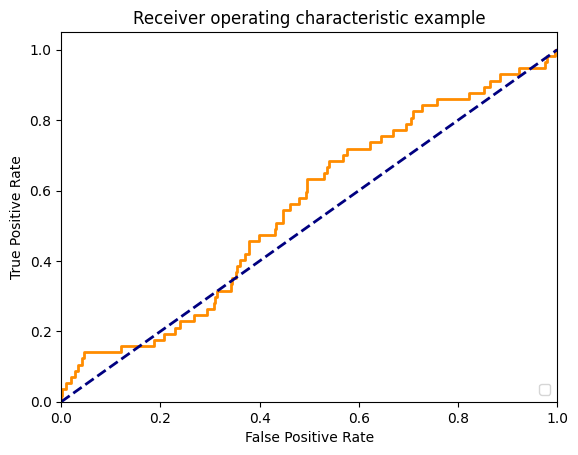

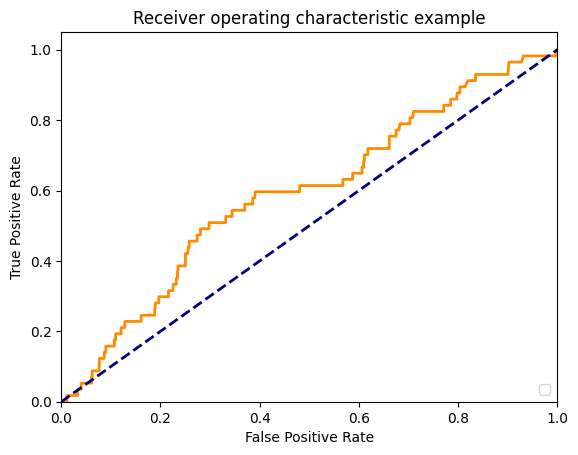

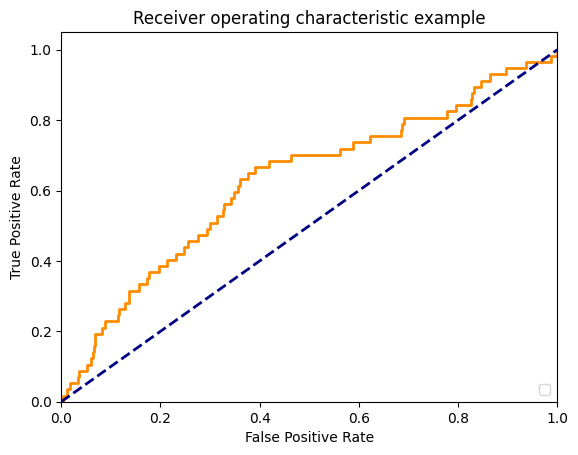

In [27]:
for iKey in model_dict:

    print(f'##### Now processing model {iKey} #####')
    LogMetrics(model_dict[iKey],X_test, y_test)